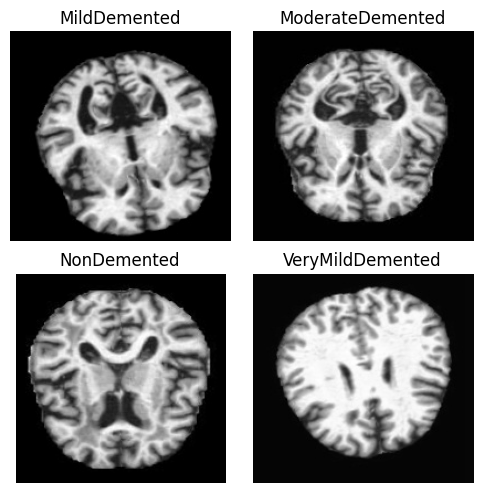

In [2]:
# checking one file

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random


# Function to get a random image from a directory
def get_random_image(directory):
    image_files = [
        f for f in os.listdir(directory) if f.endswith((".jpg", ".png", ".jpeg"))
    ]
    if not image_files:
        raise ValueError(f"No image files found in {directory}")
    random_file = random.choice(image_files)
    return cv2.imread(os.path.join(directory, random_file), cv2.IMREAD_GRAYSCALE)


# Directory containing the dataset
dataset_dir = "./Dataset"

# Get the four category folders
categories = [
    d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))
]

if len(categories) != 4:
    raise ValueError(f"Expected 4 category folders, but found {len(categories)}")

# Load one random image from each category
images = {}
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    images[category] = get_random_image(category_dir)

# Display the images
plt.figure(figsize=(5, 5))

for i, (category, image) in enumerate(images.items(), 1):
    # plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, i)
    plt.imshow(image, cmap="gray")
    plt.title(f"{category}")
    plt.axis("off")

plt.tight_layout()
plt.show()

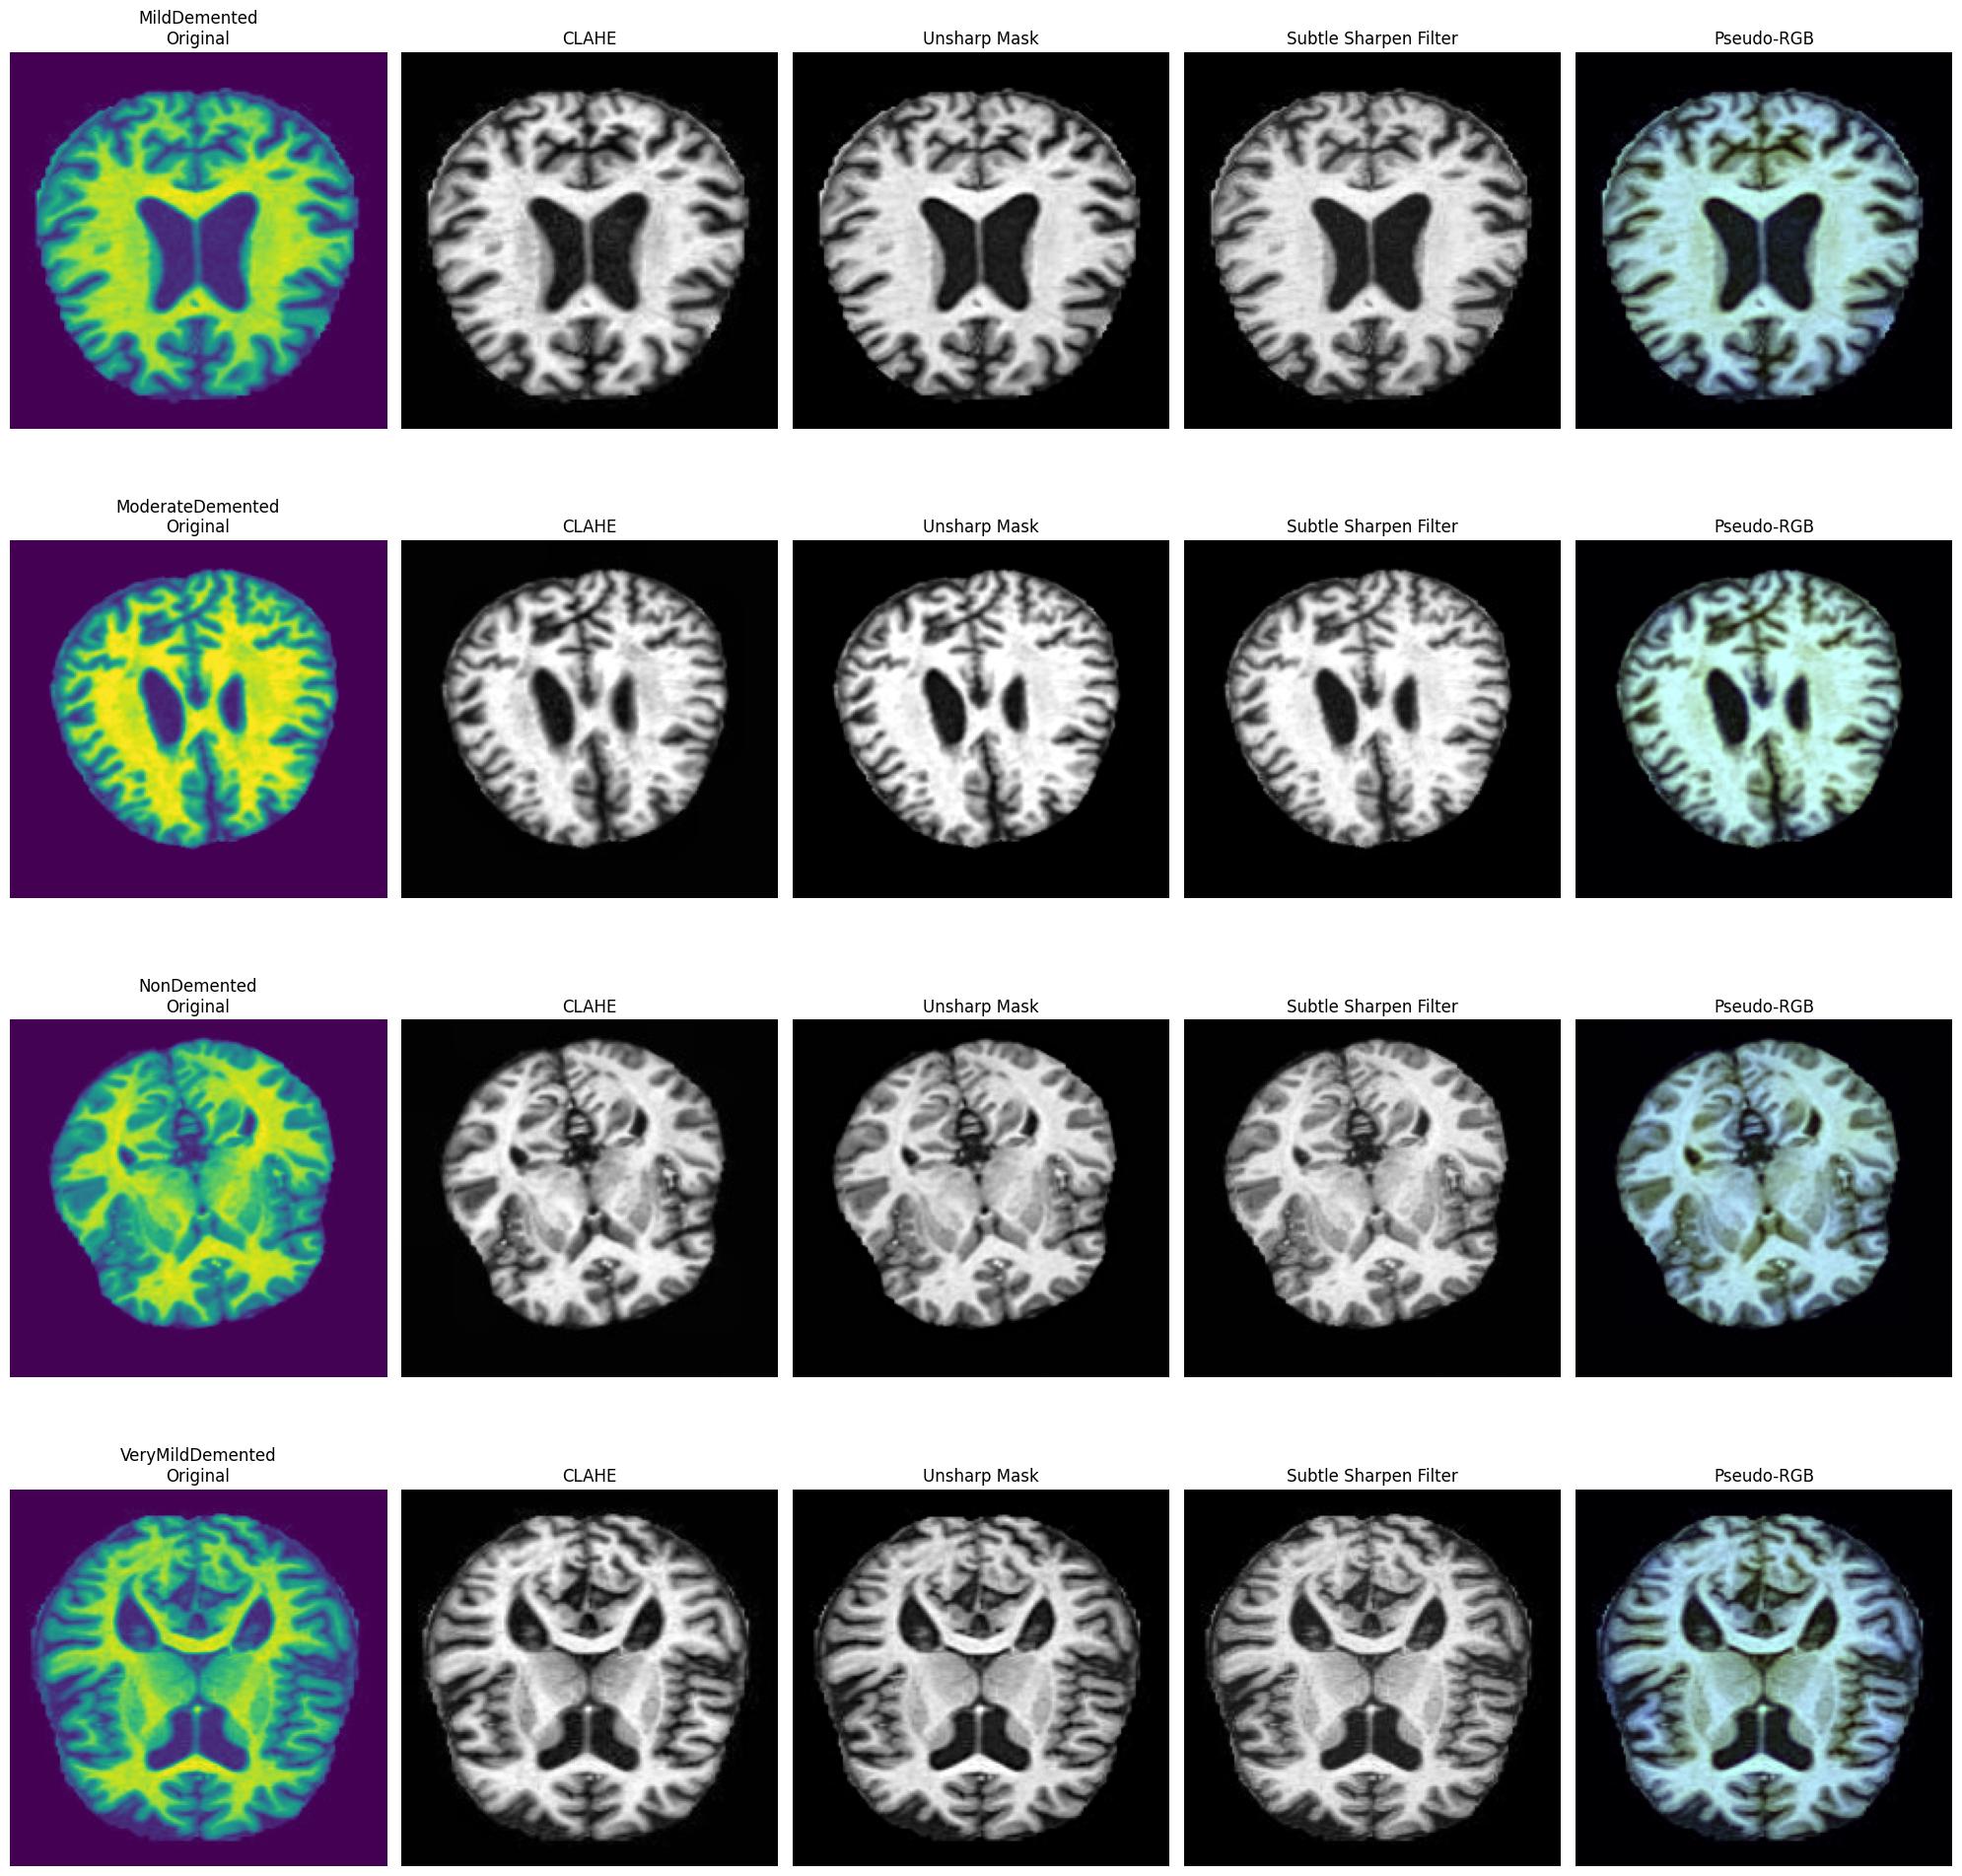

In [3]:
# Function to get a random image from a directory
def get_random_image(directory):
    image_files = [
        f for f in os.listdir(directory) if f.endswith((".jpg", ".png", ".jpeg"))
    ]
    if not image_files:
        raise ValueError(f"No image files found in {directory}")
    random_file = random.choice(image_files)
    return cv2.imread(os.path.join(directory, random_file), cv2.IMREAD_GRAYSCALE)


# Function to apply CLAHE
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)


# Function to apply unsharp masking
def apply_unsharp_mask(image):
    gaussian = cv2.GaussianBlur(image, (0, 0), 2.0)
    return cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)


def apply_subtle_sharpen(image):
    # Create the sharpening kernel
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

    # Apply the kernel to the image
    sharpened = cv2.filter2D(image, -1, kernel)

    # Blend the sharpened image with the original for a more subtle effect
    result = cv2.addWeighted(image, 0.7, sharpened, 0.1, 0)

    return result


# Directory containing the dataset
dataset_dir = "./Dataset"

# Get the four category folders
categories = [
    d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))
]

if len(categories) != 4:
    raise ValueError(f"Expected 4 category folders, but found {len(categories)}")

# Load one random image from each category
images = {}
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    images[category] = get_random_image(category_dir)

# Apply transformations and display results
plt.figure(figsize=(20, 20))

for i, (category, image) in enumerate(images.items()):
    # Apply filters
    clahe_image = apply_clahe(image)
    unsharp_image = apply_unsharp_mask(image)
    # log_image = apply_log(image)
    subtle_sharpen = apply_subtle_sharpen(image)

    # Create pseudo-RGB image
    pseudo_rgb = cv2.merge([clahe_image, unsharp_image, subtle_sharpen])

    # Display results
    plt.subplot(4, 5, 5 * i + 1), plt.imshow(image, cmap="viridis"), plt.title(
        f"{category}\nOriginal"
    )
    plt.subplot(4, 5, 5 * i + 2), plt.imshow(clahe_image, cmap="grey"), plt.title(
        "CLAHE"
    )
    plt.subplot(4, 5, 5 * i + 3), plt.imshow(unsharp_image, cmap="grey"), plt.title(
        "Unsharp Mask"
    )
    plt.subplot(4, 5, 5 * i + 4), plt.imshow(subtle_sharpen, cmap="grey"), plt.title(
        "Subtle Sharpen Filter"
    )
    plt.subplot(4, 5, 5 * i + 5), plt.imshow(
        cv2.cvtColor(pseudo_rgb, cv2.COLOR_BGR2RGB),
    ), plt.title("Pseudo-RGB")

    # Turn off axis labels
    for j in range(5 * i + 1, 5 * i + 6):
        plt.subplot(4, 5, j).axis("off")

plt.tight_layout()
plt.show()